In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import random

In [ ]:
df = pd.read_csv('/content/marketing_AB.csv')
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [ ]:
duplicates = df[df.duplicated('user id', keep=False)]
duplicates

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour


In [ ]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [ ]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


## Data Cleaning

In [ ]:
df.drop(columns = ['Unnamed: 0', 'user id'], inplace = True)
df

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


In [ ]:
df.rename(columns = lambda x: x.strip().replace(" ", "_"), inplace = True)
df.head()

,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [ ]:
df.isna().sum()

,0
test_group,0
converted,0
total_ads,0
most_ads_day,0
most_ads_hour,0


In [ ]:
df.drop_duplicates()
df.shape

(588101, 5)

In [ ]:
print("Test Group:", df['test_group'].unique())
print("Most Ads Day:", df['most_ads_day'].unique())
print("Converted:", df['converted'].unique())

Test Group: ['ad' 'psa']
Most Ads Day: ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
Converted: [False  True]


In [ ]:
df.dtypes

,0
test_group,object
converted,bool
total_ads,int64
most_ads_day,object
most_ads_hour,int64


In [ ]:
df['converted_int'] = df['converted'].apply(lambda x: 1 if x == True else 0)
df.dtypes

,0
test_group,object
converted,bool
total_ads,int64
most_ads_day,object
most_ads_hour,int64
converted_int,int64


## EDA
Distribution of Cateogorical Columns

In [ ]:
df.columns

Index(['test_group', 'converted', 'total_ads', 'most_ads_day', 'most_ads_hour',
       'converted_int'],
      dtype='object')

In [ ]:
def val_count(column):
    plt.figure(figsize = (7, 5))
    sns.countplot(data = df, x = column)
    plt.title(f'Value Count - {column}')
    plt.show()

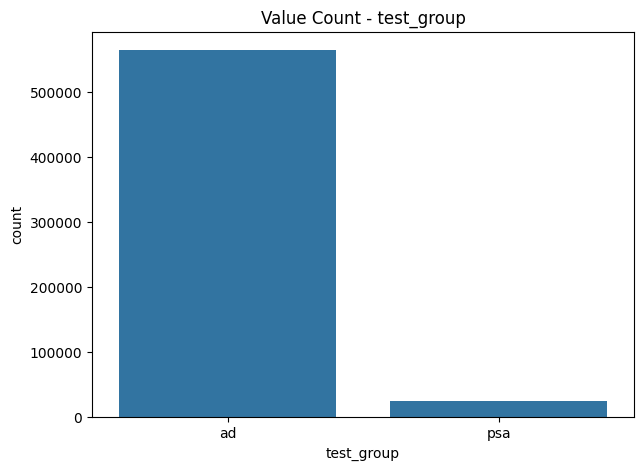

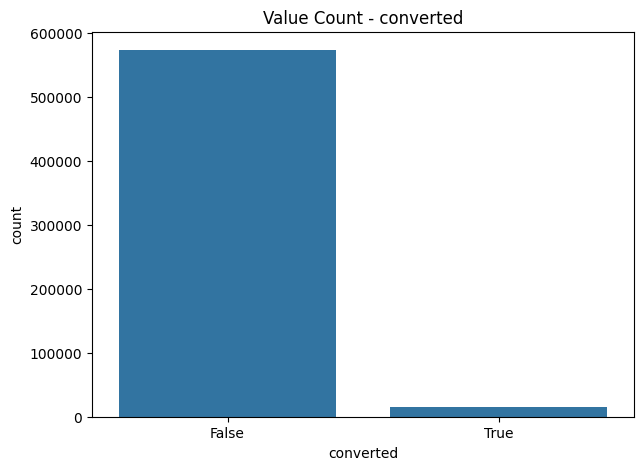

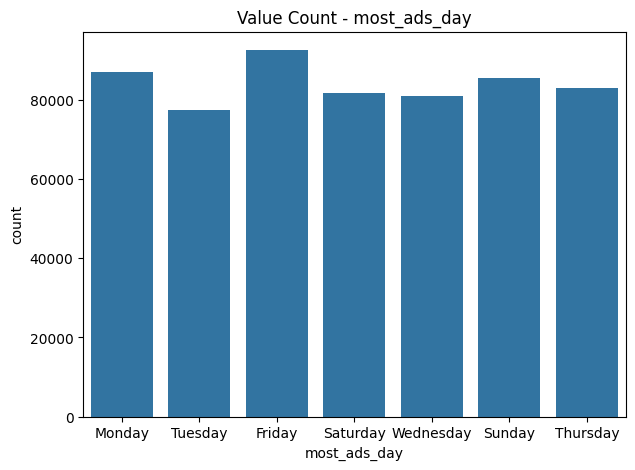

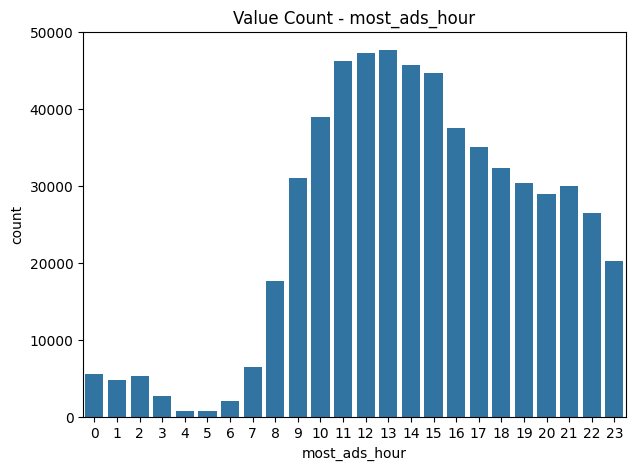

In [ ]:
col_eda = df.columns[[0, 1, 3, 4]]

for i in col_eda:
    val_count(i)

Conversion Rates by Test Group Value Counts

Text(0, 0.5, '')

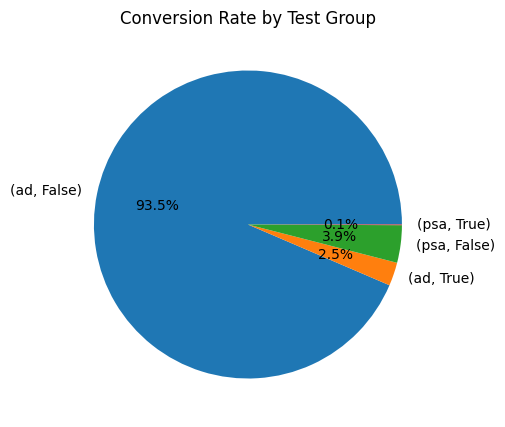

In [ ]:
grouped_count = df.groupby('test_group')['converted'].value_counts()
grouped_count.plot.pie(figsize = (5, 5), autopct = '%1.1f%%')
plt.title('Conversion Rate by Test Group')
plt.ylabel('')

93.5% users exposed to ads did not convert. 2.5% users exposed to ads converted.

## Conversion Rates by Test Group

In [ ]:
conversion_rates = df.groupby('test_group')['converted'].mean()
conversion_rates

,converted
test_group,
ad,0.025547
psa,0.017854


Text(0, 0.5, 'Conversion Rate')

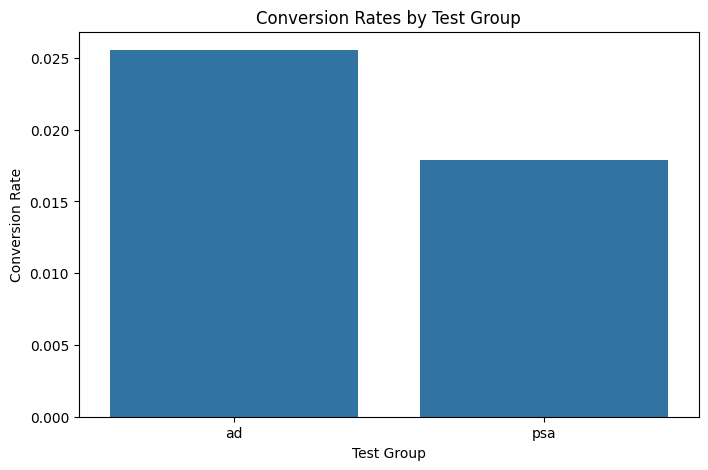

In [ ]:
plt.figure(figsize = (8, 5))
sns.barplot(x = conversion_rates.index, y = conversion_rates.values)
plt.title('Conversion Rates by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')

## Conversion Rate by Most Ads Day


Conversion Rates by Most Ads Day:
most_ads_day
Monday       0.032812
Tuesday      0.029840
Wednesday    0.024942
Thursday     0.021571
Friday       0.022212
Saturday     0.021051
Sunday       0.024476
Name: converted, dtype: float64


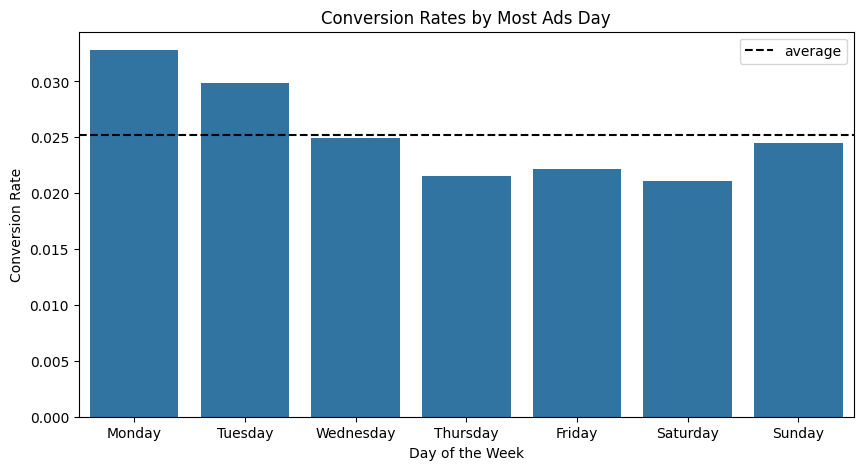

In [ ]:
conversion_by_day = df.groupby('most_ads_day')['converted'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\nConversion Rates by Most Ads Day:")
print(conversion_by_day)


plt.figure(figsize=(10, 5))
sns.barplot(x=conversion_by_day.index, y=conversion_by_day.values)
plt.axhline(df['converted'].mean(), color = 'black', linestyle = '--', label = 'average')
plt.legend()
plt.title('Conversion Rates by Most Ads Day')
plt.xlabel('Day of the Week')
plt.ylabel('Conversion Rate')
plt.show()

Mondays and Tuesdays had the most successful campaigns.


Conversion Rates by Most Ads Hour:
most_ads_hour
0     0.018425
1     0.012911
2     0.007313
3     0.010452
4     0.015235
5     0.020915
6     0.022244
7     0.018111
8     0.019516
9     0.019191
10    0.021521
11    0.022116
12    0.023828
13    0.024677
14    0.028063
15    0.029653
16    0.030772
17    0.028210
18    0.027380
19    0.026720
20    0.029803
21    0.028923
22    0.026105
23    0.022662
Name: converted, dtype: float64


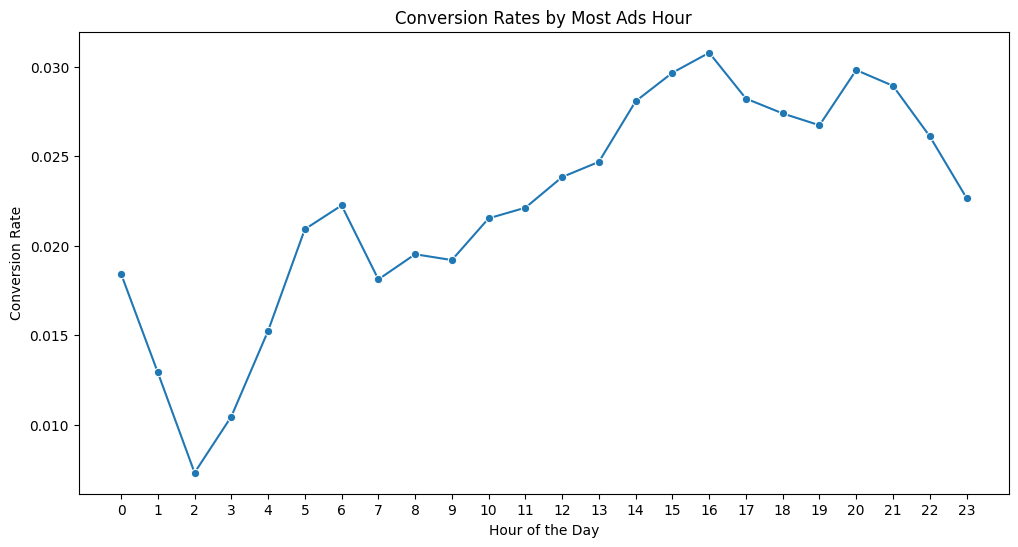

In [ ]:
conversion_by_hour = df.groupby('most_ads_hour')['converted'].mean()
print("\nConversion Rates by Most Ads Hour:")
print(conversion_by_hour)

plt.figure(figsize=(12, 6))
sns.lineplot(x=conversion_by_hour.index, y=conversion_by_hour.values, marker = 'o')
plt.title('Conversion Rates by Most Ads Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate')
plt.xticks(range(0, 24))
plt.show()

The most successful campaigns occurred between 2pm to 4pm.

## A/B Testing

Test 1

Null Hypothesis (H0): There is no difference in conversion rates between Variant A ('ad') and Variant B ('psa').

Alternative Hypothesis (H1): There is a difference in conversion rates between Variant A and Variant B.

In [ ]:
conversion_counts = df.groupby('test_group')['converted'].sum()
sample_sizes = df['test_group'].value_counts()

print(f"Conversion Rates:{conversion_rates}")
print(f"\nConversion Counts:{conversion_counts}")
print(f"\nSample Sizes: {sample_sizes}")

Conversion Rates:test_group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

Conversion Counts:test_group
ad     14423
psa      420
Name: converted, dtype: int64

Sample Sizes: test_group
ad     564577
psa     23524
Name: count, dtype: int64


2 sample Z-test

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

total_users = df['test_group'].value_counts()
z_stat, p_val = proportions_ztest(count = conversion_counts, nobs = total_users)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_val}")

Z-statistic: 7.3700781265454145
P-value: 1.7052807161559727e-13


In [ ]:
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in conversion rates between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in conversion rates between the two groups.")

Reject the null hypothesis: There is a statistically significant difference in conversion rates between the two groups.


## Test 2
Null Hypothesis (H0): There is no significant association between showing ads and the number of purchases.

Alternate Hypothesis (H1): There is a significant association between showing ads and the number of purchases.

Chi-Square test

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['test_group'], df['converted'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between showing ads and the number of purchases.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between showing ads and the number of purchases.")

Chi-square statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
Reject the null hypothesis: There is a significant association between showing ads and the number of purchases.


## Test 3
Null Hypothesis (H0): The mean number of ads shown to users in the 'ad' group is equal to the mean number of ads shown to users in the 'psa' group.

Alternate Hypothesis (H1): The mean number of ads shown to users in the 'ad' group is not equal to the mean number of ads shown to users in the 'psa' group.

2 sample T-test

In [ ]:
from scipy.stats import ttest_ind

df['total_ads'] = pd.to_numeric(df['total_ads'], errors='coerce')

ads_group = df[df['test_group'] == 'ad']['total_ads']
psa_group = df[df['test_group'] == 'psa']['total_ads']

t_stat, p_val = ttest_ind(ads_group, psa_group, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in the average number of ads shown between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in the average number of ads shown between the two groups.")

T-statistic: 0.21799691449238462
P-value: 0.8274332524963
Fail to reject the null hypothesis: There is no statistically significant difference in the average number of ads shown between the two groups.


## Test 4
Null Hypothesis (H0): There is a statistically significant difference in the average number of ads viewed between the groups.

Alternate Hypothesis (H1): There is no statistically significant difference in the average number of ads viewed between the groups.

ANOVA test


In [ ]:
from scipy.stats import f_oneway

ad_group = df[df['test_group'] == 'ad']['total_ads']
psa_group = df[df['test_group'] == 'psa']['total_ads']

f_stat, p_val = f_oneway(ad_group, psa_group)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in the average number of ads viewed between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in the average number of ads viewed between the groups.")

F-statistic: 0.045759626208427315
P-value: 0.8306134187285898
Fail to reject the null hypothesis: There is no statistically significant difference in the average number of ads viewed between the groups.
